<a href="https://colab.research.google.com/github/Keenandrea/stocks-and-sentiment/blob/master/Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

## De Rigueur Libraries

---



In [0]:
import os
import glob
import json
import random
import pandas as pd
import numpy  as np
import datetime as dt
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

Using TensorFlow backend.




---



---





---

## Kaggle Meets Colab

---

Want to access Kaggle data from Colab? Course you do. So: login to Kaggle. Next tab to: [ your profile -> my account -> more -> account -> create new API token ]. And one kaggle.json should start downloading. Then: 

Open kaggle.json. Copy "YOUR_USERNAME" and ”SOME-BETY-BETY-LONG-STRING” from line { “username” : ”YOUR-USER-NAME”, ”key” : ”SOME-BETY-BETY-LONG-STRING” }. Paste each according to the cell below: 

---



In [0]:
os.environ['KAGGLE_USERNAME'] = "keenandrea"
os.environ['KAGGLE_KEY'] = "df347d3b581e5cad8bda11ebdd72e9bb"



---

Presto. You've got all the kaggle datasets neatly before you. Seeing is believing? Sure. Run the cell below:

---



In [0]:
!kaggle datasets list -s sentiment

ref                                                    title                                          size  lastUpdated          downloadCount  
-----------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  
crowdflower/twitter-airline-sentiment                  Twitter US Airline Sentiment                    3MB  2019-10-16 00:04:05          32193  
harriken/emoji-sentiment                               Emoji sentiment                                12MB  2017-10-01 09:56:54           2170  
bittlingmayer/amazonreviews                            Amazon Reviews for Sentiment Analysis         493MB  2017-05-24 13:05:13          18599  
kazanova/sentiment140                                  Sentiment140 dataset with 1.6 million tweets   81MB  2017-09-13 22:43:19          20087  
crowdflower/first-gop-debate-twitter-sentiment         First GOP Debate Twitter Sentiment               0B  2016-10-06 03:19:29   



---

Now: shop the dataset you want. Once that dataset** is found, run command !kaggle datasets download -d NAME_OF_YOUR_DESIRED_DATASET -p /content. For instance, I want kazanova/sentiment140. That's point [1,4] on the list above, which is column one, row four. That's what I want. This is how I get it:

**[Footnote]: alternatively, run !kaggle datasets list, to display the whole kit-and-kaboodle. What you see one cell up is a filtering option to search kaggle datasets with substring [-s] sentiment [sentiment].  

---



In [0]:
!kaggle datasets download -d kazanova/sentiment140 -p /content

 94% 76.0M/80.9M [00:01<00:00, 34.1MB/s]
100% 80.9M/80.9M [00:02<00:00, 42.0MB/s]




---

Last things last, you've got to unzip the dataset, and then turn it loose on your Colabook. Easy peasy.

---



In [0]:
!unzip -q sentiment140.zip



---



---





---

# Data Visualization

---



---

### Ingest Stocks Data

---

Return a list containing the names of the entries in the directory containing stock data with pith and exactitude.

---




In [0]:
!unzip stocks_yr.zip
filenames = glob.glob('stocks_yr' + '/*.csv')

unzip:  cannot find or open stocks_yr.zip, stocks_yr.zip.zip or stocks_yr.zip.ZIP.




---

### Ingest Custom Stocks Data

---

In order to juxtapose two different time series datasets, we've got to make sure the load from each dataset is in the same time context. For our sentiment dataset, the Tweets span the year 2009 only, so I'll pull data from a massive stock dataset on 17 individual corporative stock analysis in the year 2009.

Data manipulation has been done in R. The product of which results in 17 seperate csv files, each file containing stock data of a single corporation from the year 2009. A repository of my work can be found [here](https://github.com/Keenandrea/stockLoad). 

---





---

Now: Variablize each file in filenames with its correct stock abbreviation:

---



In [0]:
aa_yr    = pd.read_csv(filenames[0],sep=',',index_col='Date')
aapl_yr  = pd.read_csv(filenames[1],sep=',',index_col='Date')
acn_yr   = pd.read_csv(filenames[2],sep=',',index_col='Date')
amzn_yr  = pd.read_csv(filenames[3],sep=',',index_col='Date')
googl_yr = pd.read_csv(filenames[4],sep=',',index_col='Date')
gtim_yr  = pd.read_csv(filenames[5],sep=',',index_col='Date')
ibm_yr   = pd.read_csv(filenames[6],sep=',',index_col='Date')
llnw_yr  = pd.read_csv(filenames[7],sep=',',index_col='Date')
mrk_yr   = pd.read_csv(filenames[8],sep=',',index_col='Date')
msft_yr  = pd.read_csv(filenames[9],sep=',',index_col='Date')
powl_yr  = pd.read_csv(filenames[10],sep=',',index_col='Date')
star_yr  = pd.read_csv(filenames[11],sep=',',index_col='Date')
teck_yr  = pd.read_csv(filenames[12],sep=',',index_col='Date')
tol_yr   = pd.read_csv(filenames[13],sep=',',index_col='Date')
trxc_yr  = pd.read_csv(filenames[14],sep=',',index_col='Date')
utg_yr   = pd.read_csv(filenames[15],sep=',',index_col='Date')
xrx_yr   = pd.read_csv(filenames[16],sep=',',index_col='Date')



---

Moreover: Rig together a dataframe out of a single feature column for each company:

---



In [0]:
close_price = pd.DataFrame()
close_price['aa_yr']    = aa_yr['Close']
close_price['aapl_yr']  = aapl_yr['Close']
close_price['acn_yr']   = acn_yr['Close']
close_price['amzn_yr']  = amzn_yr['Close']
close_price['googl_yr'] = googl_yr['Close']
close_price['gtim_yr']  = gtim_yr['Close']
close_price['ibm_yr']   = ibm_yr['Close']
close_price['llnw_yr']  = llnw_yr['Close']
close_price['mrk_yr']   = mrk_yr['Close']

close_price['msft_yr']  = msft_yr['Close']
close_price['powl_yr']  = powl_yr['Close']
close_price['star_yr']  = star_yr['Close']
close_price['teck_yr']  = teck_yr['Close']
close_price['tol_yr']   = tol_yr['Close']
close_price['trxc_yr']  = trxc_yr['Close']
close_price['utg_yr']   = utg_yr['Close']
close_price['xrx_yr']   = xrx_yr['Close']



---

Provide our companies with what they need, that is, an index. But not just any. A datetime64[ns] dex. Plus: The two lines below may be uncommented at your own free will for further analysis. 

---



In [0]:
close_price.index = close_price.index.astype('datetime64[ns]')
# close_price.describe()
# close_price.head(30)



---

Here: This is where we're going to plot the close_price variable for our companies over time:

---



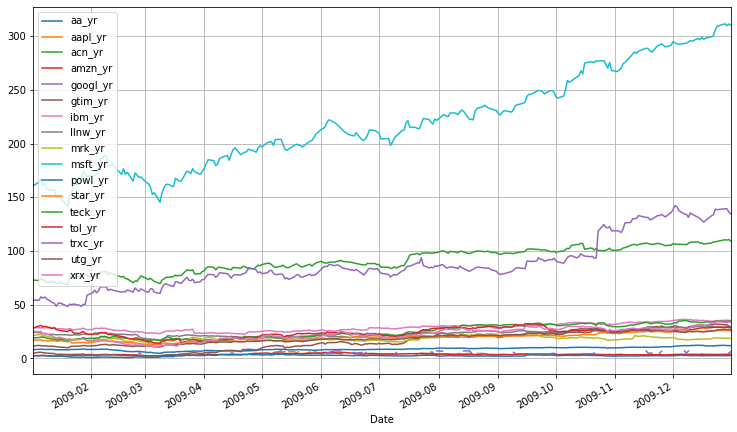

In [0]:
%matplotlib inline
_ = pd.concat([close_price['aa_yr'],
               close_price['aapl_yr'],
               close_price['acn_yr'],
               close_price['amzn_yr'],
               close_price['googl_yr'],
               close_price['gtim_yr'],
               close_price['ibm_yr'],
               close_price['llnw_yr'],
               close_price['mrk_yr'],
               close_price['msft_yr'],
               close_price['powl_yr'],
               close_price['star_yr'],
               close_price['teck_yr'],
               close_price['tol_yr'],
               close_price['trxc_yr'],
               close_price['utg_yr'],
               close_price['xrx_yr']],axis=1).plot(figsize=(12.5,7.5),grid=True)



---

### Plot Autocorrelation

---

Thing is, time-series data has a side-effect called periodicity, which is the regard given to rises and peaks in the data that are correlated with time. For instance, starbucks would likely see a spike in coffee sales at the morning rush-hours. Hence, exhibiting a periodicity of a day. Bars might harbor a bump in sales on Friday, therefore and thusly exhibiting periodicity over the course of a week.

Autocorrelation takes this concept further. What is it? A multivariate summarization-type plot that lets you check every periodicity at the same time. How does it do that? By computing a summary statistic, the correlation score, across every possible lag in the dataset.

Lag is on the x-axis, while the autocorrelation score is on the y-axis. Rule of thumb is: The farther away the autocorrelation is from zero, the greater the influence that records far from each other exert on one another. 

---



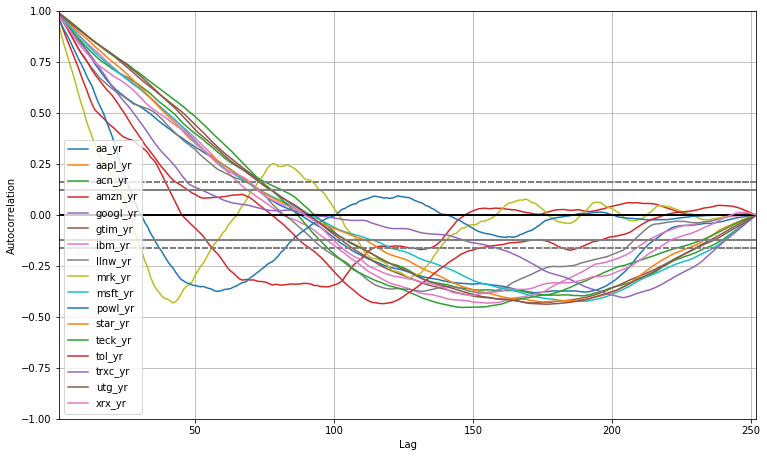

In [0]:
company_list = close_price.columns

fig = plt.figure()
fig.set_figwidth(12.5)
fig.set_figheight(7.5)

for i in company_list:
  _ = autocorrelation_plot(close_price[i],label=i)



---



---





---

# Algorithmic Showdown

---





---

We'll start slow, using NASDAQ stock data from the year 2009 as our training and testing sets. Constant NASDAQ defines the market summary of a corporation.

---



In [0]:
NASDAQ = amzn_yr

In [0]:
NASDAQ = pd.read_csv(filenames[3],sep=',')
rows = NASDAQ.values.tolist()
NASDAQ.drop(columns='OpenInt')
amzn_yr.shape

(252, 6)



---

Our split makes use of sklearn.model_selection for train_test_split, which, under our particular case study, translates to train_validation split. Keeping this in mind, we'll be training on 80% of the data, validating on the remaining 20%.

---



In [0]:
x_train = []
y_train = []
x_test = []
y_test = []
X = []
Y = []

for row in rows:
    X.append(int(''.join(row[0].split('-'))))
    Y.append(row[1])
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)



---

## Linear Regression Model

---



---



In [0]:
from sklearn.linear_model import LinearRegression 
clf_lr = LinearRegression()
clf_lr.fit(x_train,y_train)
y_pred_lr = clf_lr.predict(x_test)



---

## Support Vector Machine

---

With a radial basis function as a kernel.

---



In [0]:
from sklearn.svm import SVR
clf_svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
clf_svr.fit(x_train,y_train)
y_pred_svr = clf_svr.predict(x_test)



---

## Random Forest Regressor

---



---



In [0]:
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor(n_estimators=100)
clf_rf.fit(x_train,y_train)
y_pred_rf = clf_rf.predict(x_test)

NameError: ignored



---

## Gradient Boosting Regressor

---



---



In [0]:
from sklearn.ensemble import GradientBoostingRegressor
clf_gb = GradientBoostingRegressor(n_estimators=200)
clf_gb.fit(x_train,y_train)
y_pred_gb = clf_gb.predict(x_test)



---

### Model Visualization

---

Multiple predicted values from our different models are visualized to see how well each algorithm predicts values.

---



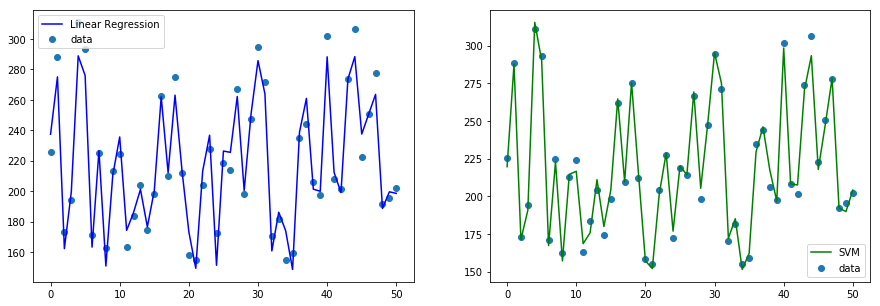

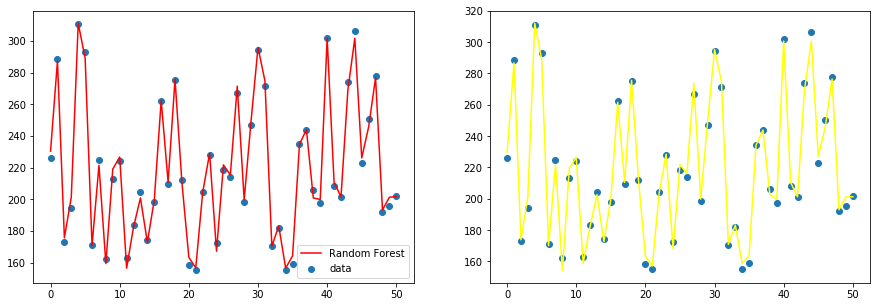

In [0]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

# Linear Regression
ax1.scatter(range(len(y_test)),y_test,label='data')
ax1.plot(range(len(y_test)),y_pred_lr,color='blue',label='Linear Regression')
ax1.legend()

# Support Vector Machine
ax2.scatter(range(len(y_test)),y_test,label='data')
ax2.plot(range(len(y_test)),y_pred_svr,color='green',label='SVM')
ax2.legend()

f1,(ax3,ax4) = plt.subplots(1,2,figsize=(15,5))

# Random Forest Regressor
ax3.scatter(range(len(y_test)),y_test,label='data')
ax3.plot(range(len(y_test)),y_pred_rf,color='red',label='Random Forest')
ax3.legend()

# Gradient Boosting Regressor
ax4.scatter(range(len(y_test)),y_test,label='data')
ax4.plot(range(len(y_test)),y_pred_gb,color='yellow',label='Gradient Boosting')
ax4.legend()



---

### The Nitty-Gritty: Accuracy

---

Cell returns the coefficient determination of R-squared of the prediction, which, in other words, is the numerical embodiment of how close the data are to the fitted regression line.

---



In [0]:
print("Accuracy of Linear Regression:",clf_lr.score(x_test,y_test))
print("Accuracy of Support Vector Machine:",clf_svr.score(x_test,y_test))
print("Accuracy of Random Forest Regressor:",clf_rf.score(x_test,y_test))
print("Accuracy of Gradient Boosting Regressor:",clf_gb.score(x_test,y_test))

Accuracy of Linear Regression: 0.9489250892496076
Accuracy of Support Vector Machine: 0.9896816847263995
Accuracy of Random Forest Regressor: 0.9947654591061906
Accuracy of Gradient Boosting Regressor: 0.994254971581112




---

# LSTM

---



---





---

### Read Data

---



In [0]:
data = []
for f in filenames:
  df = pd.read_csv(f,sep=',')
  label, _ = f.split(sep='.')
  df['Label'] = f
  df['Date'] = pd.to_datetime(df['Date'])
  data.append(df)



---

### Split Data

---



In [0]:
df = data[0]
window = 10
split_date = list(data[0]["Date"][-(2*window+1):])[0]

train, test = df[df['Date'] < split_date], df[df['Date'] >= split_date]
train = train.drop(['Date','Label','OpenInt'],1)
test = test.drop(['Date','Label','OpenInt'],1)



---

### Create Windows for Training

---



In [0]:
train_in = []
for i in range(len(train) - window):
  temp = train[i:(i + window)].copy()
  
  for j in list(temp):
    temp[j] = temp[j] / temp[j].iloc[0] - 1
    
  train_in.append(temp)
  
train_out = (train['Close'][window:].values/train['Close'][:-window].values)-1

train_in = [np.array(train_in) for train_in in train_in]
train_in = np.array(train_in)



---

### Create Windows for Testing

---



In [0]:
test_in = []
for i in range(len(test) - window):
  temp = test[i:(i + window)].copy()
  
  for j in list(temp):
    temp[j] = temp[j] / temp[j].iloc[0] - 1
  
  test_in.append(temp)
  
test_out = (test['Close'][window:].values / test['Close'][:-window].values)-1

test_in = [np.array(test_in) for test_in in test_in]
test_in = np.array(test_in)



---

### Build LSTM

---



In [0]:
def build(inputs, output_size, neurons, activ_func="linear",
                dropout=0.10, loss="mae", optimizer="adam"):
    
    model = Sequential()
    
    model.add(LSTM(neurons,input_shape=(inputs.shape[1],inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model



---

### Train LSTM

---

Our model output is the next price normalized to the 10th previous closing price.

---




In [0]:
model = build(train_in, output_size=1, neurons = 32)
history = model.fit(train_in,train_out,epochs=5,batch_size=1,shuffle=True)



---

### Predict One Data Point Ahead

---



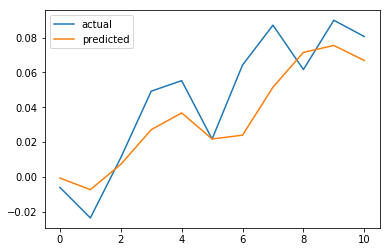

MAE: 0.016368934534138468


In [0]:
plt.plot(test_out,label = "actual")
plt.plot(model.predict(test_in),label = "predicted")
plt.legend()
plt.show()

MAE = mean_absolute_error(test_out,model.predict(test_in))
print('MAE: {}'.format(MAE))



---

### Predict One Window Ahead

---

Each window is 10 time steps ahead. What we do, we shift the window by a single new prediction each time, then re-run the predictions on our new window.


---



In [0]:
def predict_window(model, data, window_size):
    curr_frame = data[0]
    predicted = []
    for i in range(len(data)):
        predicted.append(model.predict(curr_frame[np.newaxis,:,:])[0,0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame,[window_size-1],predicted[-1],axis=0)
    return predicted

predictions = predict_window(model, test_in, 10)

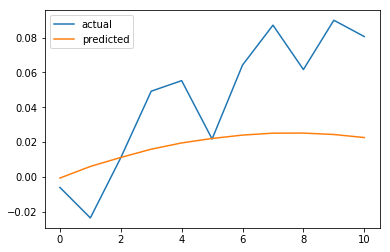

MAE: 0.03334837197928289


In [0]:
plt.plot(test_out,label="actual")
plt.plot(predictions,label="predicted")
plt.legend()
plt.show()
MAE = mean_absolute_error(test_out,predictions)
print('MAE: {}'.format(MAE))



---

These four models train with lightspeed performance on Amazon's stock data, that data being so small, having only 252 rows by 7 feature columns. However, the proof is in the pudding: Random Forest Regression and Gradient Boosing Regression outperform Linear Regression and the Support Vector Machine.

What's more, as we can see from the plots above, LSTMs, while they don't necessarily solve the time series prediction, show promise.

---


---







---

# Tweet Sentiment

---

Here we're going to parse, clean, embed, analyze, train, and obtain sentiment predictions for the *sentiment140* kaggle dataset in order to juxtapose sentiment of the hoi polloi of twitter over the year 2009 with each individual companies stock value.

---



In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline
import random

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

import pickle
import re
from collections import Counter
from string import punctuation
import tweepy
from tweepy import OAuthHandler
import json
from wordcloud import WordCloud

from IPython.display import IFrame
import folium
from folium import plugins
from folium.plugins import MarkerCluster, FastMarkerCluster, HeatMapWithTime

pd.set_option('display.max_colwidth', 100)
plt.style.use('seaborn-white')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)




---

### Input Features

---

There are six feature columns in the twitter sentiment dataset. All six are void of labels.  

---




In [0]:
tweet_file = 'training.1600000.processed.noemoticon.csv'

In [0]:
cleaning = '@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+'
features = ['label','id','date','flag','user','text']
encoding = 'ISO-8859-1'

In [0]:
df = pd.read_csv(tweet_file,names=features,encoding=encoding)
df.head()

,label,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Thi..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School to...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you a..."


In [0]:
print('Dataset size of',df.shape[0],'rows and',df.shape[1],'columns')

Dataset size of 1600000 rows and 6 columns




---

To clear the fluff, we remove three feature columns that contribute very little to our purpose, namely id, flag, and user.

---



In [0]:
date = df[['date']].copy()
df = df.drop(columns=['id','date','flag','user'])
df.head()

,label,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Thi..."
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School to...
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you a..."




---

### Cleaning The Text of Foofaraw

---



---



In [0]:
def cleaner(text: str):
    crew = re.compile(cleaning)
    text = re.sub(crew, '  ',text)   
    return re.sub(' +', ' ', text)

In [0]:
df['cleaned'] = df['text'].apply(lambda x: cleaner(x))
df.head()

,label,text,cleaned
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Thi...",Awww that s a bummer You shoulda got David Carr of Third Day to do it D
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School to...,is upset that he can t update his Facebook by texting it and might cry as a result School today ...
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,I dived many times for the ball Managed to save 50 The rest go out of bounds
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you a...",no it s not behaving at all i m mad why am i here because I can t see you all over there


In [0]:
def tokenizer(text):
  text = re.split('\W+',text)
  return text
df['tokenized'] = df['cleaned'].apply(lambda x: tokenizer(x.lower()))
df.head()

,label,text,cleaned,tokenized
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Thi...",Awww that s a bummer You shoulda got David Carr of Third Day to do it D,"[, awww, that, s, a, bummer, you, shoulda, got, david, carr, of, third, day, to, do, it, d]"
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School to...,is upset that he can t update his Facebook by texting it and might cry as a result School today ...,"[is, upset, that, he, can, t, update, his, facebook, by, texting, it, and, might, cry, as, a, re..."
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,I dived many times for the ball Managed to save 50 The rest go out of bounds,"[, i, dived, many, times, for, the, ball, managed, to, save, 50, the, rest, go, out, of, bounds]"
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its, on, fire, ]"
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you a...",no it s not behaving at all i m mad why am i here because I can t see you all over there,"[, no, it, s, not, behaving, at, all, i, m, mad, why, am, i, here, because, i, can, t, see, you,..."


In [0]:
all_words = []
for line in list(df['cleaned']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())   
stop_words = Counter(all_words).most_common(28)

In [0]:
nltk.download('stopwords')

stopword = nltk.corpus.stopwords.words('english')
stopword.extend(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
df['no_stopwords'] = df['tokenized'].apply(lambda x: remove_stopwords(x))
df.head()

,label,text,cleaned,tokenized,no_stopwords
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Thi...",Awww that s a bummer You shoulda got David Carr of Third Day to do it D,"[, awww, that, s, a, bummer, you, shoulda, got, david, carr, of, third, day, to, do, it, d]","[, awww, bummer, shoulda, got, david, carr, third, day]"
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School to...,is upset that he can t update his Facebook by texting it and might cry as a result School today ...,"[is, upset, that, he, can, t, update, his, facebook, by, texting, it, and, might, cry, as, a, re...","[upset, update, facebook, texting, might, cry, result, school, today, also, blah, ]"
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,I dived many times for the ball Managed to save 50 The rest go out of bounds,"[, i, dived, many, times, for, the, ball, managed, to, save, 50, the, rest, go, out, of, bounds]","[, dived, many, times, ball, managed, save, 50, rest, go, bounds]"
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its, on, fire, ]","[whole, body, feels, itchy, like, fire, ]"
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you a...",no it s not behaving at all i m mad why am i here because I can t see you all over there,"[, no, it, s, not, behaving, at, all, i, m, mad, why, am, i, here, because, i, can, t, see, you,...","[, behaving, mad, see, ]"


In [0]:
all_words = []
stop_words= []
for line in list(df['cleaned']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())   
stop_words = Counter(all_words).most_common(53)

In [0]:
def word_frequency(word):
  df[word] = df['cleaned'].str.count(word)

for i in range(28,len(stop_words),1):
  word_frequency(stop_words[i][0])

In [0]:
df.tail()

,label,text,cleaned,tokenized,no_stopwords,now,can,good,up,day,all,out,get,like,are,no,go,quot,today,do,too,your,work,love,going,we,got,what,lol,time
1599995,4,Just woke up. Having no school is the best feeling ever,Just woke up Having no school is the best feeling ever,"[just, woke, up, having, no, school, is, the, best, feeling, ever, ]","[woke, school, best, feeling, ever, ]",0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1599996,4,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta,TheWDB com Very cool to hear old Walt interviews,"[thewdb, com, very, cool, to, hear, old, walt, interviews, ]","[thewdb, com, cool, hear, old, walt, interviews, ]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1599997,4,Are you ready for your MoJo Makeover? Ask me for details,Are you ready for your MoJo Makeover Ask me for details,"[are, you, ready, for, your, mojo, makeover, ask, me, for, details, ]","[ready, mojo, makeover, ask, details, ]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1599998,4,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur,Happy 38th Birthday to my boo of alll time Tupac Amaru Shakur,"[happy, 38th, birthday, to, my, boo, of, alll, time, tupac, amaru, shakur, ]","[happy, 38th, birthday, boo, alll, time, tupac, amaru, shakur, ]",0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1599999,4,happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H,happy charitytuesday theNSPCC SparksCharity SpeakingUpH4H,"[happy, charitytuesday, thenspcc, sparkscharity, speakinguph4h, ]","[happy, charitytuesday, thenspcc, sparkscharity, speakinguph4h, ]",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
nltk.download('wordnet')

wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['lemmatized'] = df['no_stopwords'].apply(lambda x: lemmatizer(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,label,date,text,cleaned,tokenized,no_stopwords,stemmed,lemmatized
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Thi...",Awww that s a bummer You shoulda got David Carr of Third Day to do it D,"[, awww, that, s, a, bummer, you, shoulda, got, david, carr, of, third, day, to, do, it, d]","[, awww, bummer, shoulda, got, david, carr, third, day]","[, awww, bummer, shoulda, got, david, carr, third, day]","[, awww, bummer, shoulda, got, david, carr, third, day]"
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by texting it... and might cry as a result School to...,is upset that he can t update his Facebook by texting it and might cry as a result School today ...,"[is, upset, that, he, can, t, update, his, facebook, by, texting, it, and, might, cry, as, a, re...","[upset, update, facebook, texting, might, cry, result, school, today, also, blah, ]","[upset, updat, facebook, text, might, cri, result, school, today, also, blah, ]","[upset, update, facebook, texting, might, cry, result, school, today, also, blah, ]"
2,0,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,I dived many times for the ball Managed to save 50 The rest go out of bounds,"[, i, dived, many, times, for, the, ball, managed, to, save, 50, the, rest, go, out, of, bounds]","[, dived, many, times, ball, managed, save, 50, rest, go, bounds]","[, dive, mani, time, ball, manag, save, 50, rest, go, bound]","[, dived, many, time, ball, managed, save, 50, rest, go, bound]"
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its, on, fire, ]","[whole, body, feels, itchy, like, fire, ]","[whole, bodi, feel, itchi, like, fire, ]","[whole, body, feel, itchy, like, fire, ]"
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you a...",no it s not behaving at all i m mad why am i here because I can t see you all over there,"[, no, it, s, not, behaving, at, all, i, m, mad, why, am, i, here, because, i, can, t, see, you,...","[, behaving, mad, see, ]","[, behav, mad, see, ]","[, behaving, mad, see, ]"


In [0]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation])
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [0]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['text'])
print('{} tweets have {} different words'.format(countVector.shape[0], countVector.shape[1]))

1600000 tweets have 731118 different words




---

### Checking Positive vs. Negative Tag Counts

---

Our dataset is distributed evenly between positive and negative sentiments.

---



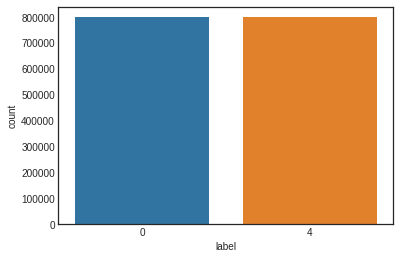

In [0]:
sns.countplot(x='label',data=df)

(-0.5, 399.5, 199.5, -0.5)

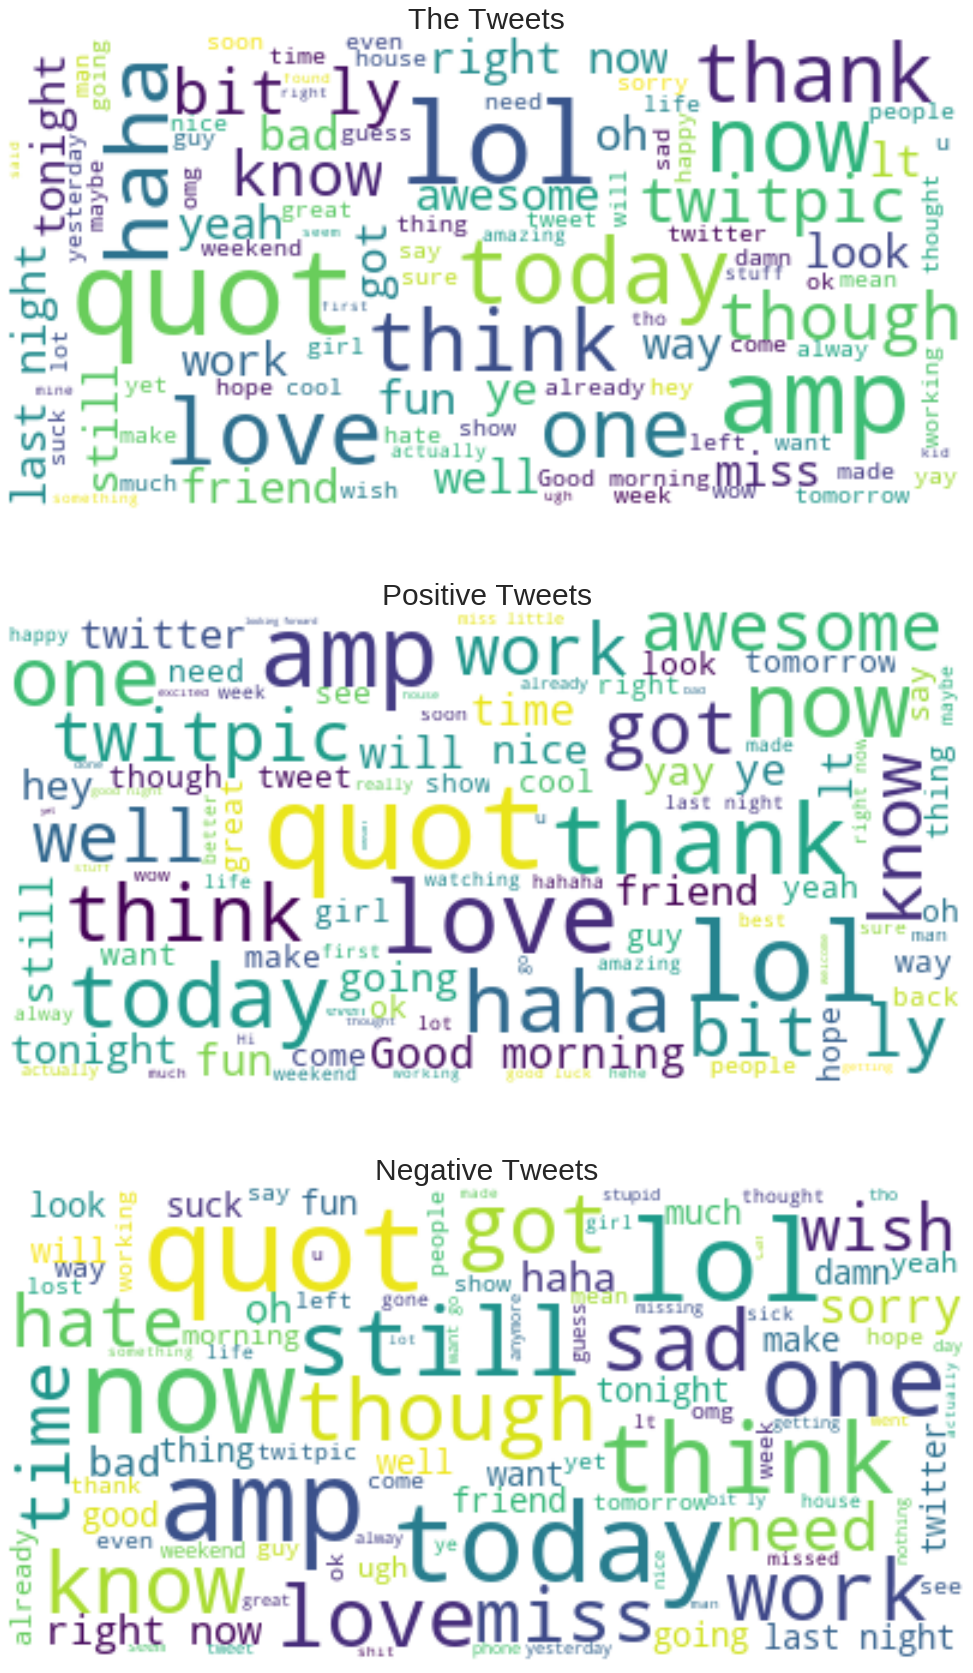

In [0]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

df_positive = df[df['label']==4]
df_negative = df[df['label']==0]
all_tweets = " ".join(review for review in df.text)
pos_tweets = " ".join(review for review in df_positive.text)
neg_tweets = " ".join(review for review in df_negative.text)

fig, ax = plt.subplots(3, 1, figsize=(30,30))
wc_all = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_tweets)
wc_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(pos_tweets)
wc_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(neg_tweets)

ax[0].imshow(wc_all, interpolation='bilinear')
ax[0].set_title('The Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wc_pos, interpolation='bilinear')
ax[1].set_title('Positive Tweets',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wc_neg, interpolation='bilinear')
ax[2].set_title('Negative Tweets',fontsize=30)
ax[2].axis('off')



---

### Checking Word Count Against Frequency

---



---



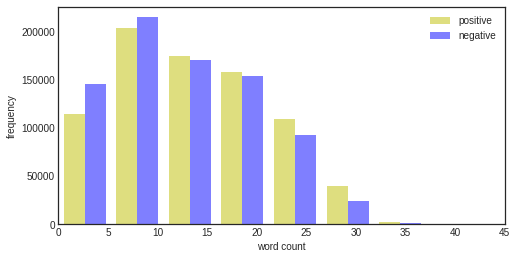

In [0]:
x = df['word count'][df.label == 0]
y = df['word count'][df.label == 4]
plt.figure(figsize=(8,4))
plt.xlim(0,45)
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y], color=['y','b'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')



---

For the most part, tweets fall between five to ten words. In the overall scope of things, tweets stick between one to twenty-five words.

---



In [0]:
def word_count(sentence):
    return len(sentence.split())

df['word count'] = df['text'].apply(word_count)



---

### Checking Most Common Words

---



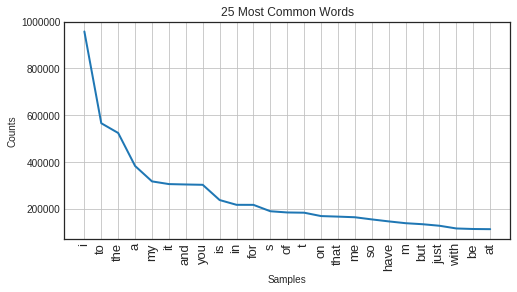

In [0]:
plt.figure(figsize=(8,4))
plt.title('25 Most Common Words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

In [0]:
df.head(100)

,label,date,text,cleaned,lol,no
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Thi...",Awww that s a bummer You shoulda got David Carr of Third Day to do it D,0,0
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by texting it... and might cry as a result School to...,is upset that he can t update his Facebook by texting it and might cry as a result School today ...,0,0
2,0,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,I dived many times for the ball Managed to save 50 The rest go out of bounds,0,0
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0,0
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you a...",no it s not behaving at all i m mad why am i here because I can t see you all over there,0,2
...,...,...,...,...,...,...
95,0,Mon Apr 06 22:26:27 PDT 2009,Strider is a sick little puppy http://apps.facebook.com/dogbook/profile/view/5248435,Strider is a sick little puppy,0,0
96,0,Mon Apr 06 22:26:28 PDT 2009,"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH B...",so rylee grace wana go steve s party or not SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH BUT OH...,0,1
97,0,Mon Apr 06 22:26:29 PDT 2009,"hey, I actually won one of my bracket pools! Too bad it wasn't the one for money",hey I actually won one of my bracket pools Too bad it wasn t the one for money,0,0
98,0,Mon Apr 06 22:26:29 PDT 2009,"@stark YOU don't follow me, either and i work for you!",YOU don t follow me either and i work for you,0,0




---

Words like *i*, *the*, *it*, and so on, are common forms of human expression. They normally appear at equal rates in both negative and positive tweets. They are filler, and tell us very little about user sentiment. As such, they can be removed from the dataset without harmful side-effects. 

---



In [0]:
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stemmer = PorterStemmer()
def filtr(st):
    st = st.lower()
    rs = [x for x in st.split() if x not in stopwords.words("english")]
    rs = [x for x in rs if (x[0] != '@' and x[:5] != 'http')]
    rs = [stemmer.stem(word=x) for x in rs]
    return ' '.join(rs)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.1, shuffle = True)

In [0]:
tv = TfidfVectorizer(ngram_range=(1,2), max_features = 10000, stop_words = 'english')
tv.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=10000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
nb=MultinomialNB(1.5, fit_prior = False)
x_train_transform = tv.transform(x_train)
nb.fit(x_train_transform, y_train)
pred1 = nb.predict(tv.transform(x_test))

In [0]:
print(accuracy_score(y_test, pred1))
print(confusion_matrix(y_test, pred1))

0.75924375
[[61117 18943]
 [19578 60362]]


In [0]:
from sklearn.model_selection import GridSearchCV
gcv = GridSearchCV(nb,{'alpha':[1.5,2,3,4,10,100,1.0,0.1,0.001,0.0001],'fit_prior':[True,False]})
gcv.fit(x_train_transform, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.5, class_prior=None,
                                     fit_prior=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1.5, 2, 3, 4, 10, 100, 1.0, 0.1, 0.001,
                                   0.0001],
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
print(gcv.best_score_,gcv.best_params_)

0.7619840277777777 {'alpha': 10, 'fit_prior': True}


In [0]:
def result(x):
    x = filtr(x)
    return nb.predict(tv.transform([x]))

In [0]:
result('hate you')

array([0])

In [0]:
result('love you')

array([4])

In [0]:
result('you are great')

array([4])

In [0]:
result('you are horrible')

array([0])

In [0]:
result('cannot believe I listened to such dumb nonsense')

array([0])

In [0]:
result('I would see that band again and again and again')

array([4])

In [0]:
result('The new samsung phone is absolute garbage')

array([0])

In [0]:
result('Apple products can stick it!')

array([4])

In [0]:
result('Apple CEO is a few pickles short of a pickle party')

array([0])

In [0]:
result('Facebook is dl spying on me')

array([4])

In [0]:
result('lol go suck an egg')

array([0])

In [0]:
result('lol go jump in a lake')

array([4])

In [0]:
result('ok. that is rude and offensive and I love it')

array([4])